# DSC 305 Final Project: _Making Centre Greener_

Jackson Norris

Shelby Young and Kat Duarte

DSC 305A S21

Final Project: Making Centre Greener

## Summary

_Making Centre Greener_ is an exploration of the energy consumption of several buildings across Centre's campus. We took this project to provide advice and recommendations to the school about how to make campus improvements more energy efficient. In our data exploration we found that LEED certified buildings are not as energy efficient as Centre would have us think. This project challenged us to explore, study, and tell a story with data. 

<b> Import Necessary Packages </b>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

## Data Exploration

### Load in Temperature Data

In [2]:
temp = pd.read_csv("temperature.csv")

We need to convert our data feature to a datetime to make merging with our building data easier. 

In [3]:
temp['Date'] = pd.to_datetime(temp['Date time'])

Drop unnecessary columns. 

In [4]:
temp.drop(columns={"Date time",'Wind Chill','Heat Index','Precipitation','Snow','Snow Depth','Wind Speed',
          'Wind Direction','Wind Gust', 'Visibility','Cloud Cover','Relative Humidity','Conditions', 'Name'}, inplace = True)

Rename columns to our liking. 

In [5]:
temp.rename(columns={"Maximum Temperature":"max_temp","Minimum Temperature":"min_temp",
                     "Temperature":"average_temp"}, inplace=True)

### Load In Building Data 

We saved CSV files of daily energy consumption for Pearl, Brock, Yerkes, and Breck. Pearl and Brock are both LEED Certified (Gold and Silver Respectively), and Yerkes and Breck are not LEED Certified. 

In [6]:
pearl = pd.read_csv("pearl_daily.csv")
breck = pd.read_csv("breck_daily.csv")
yerkes = pd.read_csv("yerkes_daily.csv")
brock = pd.read_csv("brock_daily.csv")

The following function will change the names of several features to make them easier to access. 

In [7]:
def rename_cols(dataframe): 
    dataframe.rename(columns = {"Read Date":"date","index":"day"},inplace = True)

The _add_occupancy_ function will provide a feature of approximate values for where or not the building was occupied. We said that the Summer and Winter breaks were unoccupied, Centreterm 2021 was 1/2 occupied, and the rest of the dates were occupied. In an ideal world we would have data from the Student Life Office to have data on exactly how many people lived in each building at that time. 

In [8]:
def add_occupancy(dataframe): 
    dataframe.loc[:,'occupied'] = 0
    dataframe.loc[4:77,'occupied'] = 1
    dataframe.loc[234:329,'occupied'] = 1
    dataframe.loc[374:402,'occupied'] = 1/2
    dataframe.loc[402:,'occupied'] = 1
    return dataframe 

This function adds features for kilowatts per person, kilowatts per 1000 square feet, and then the week on which the day fell. 

In [9]:
def add_capacity_and_sqft(dataframe, capacity, sq_ft): 
    dataframe.loc[:,'kw_per_person'] = dataframe.kW/capacity 
    dataframe.loc[:,'kw_per_sq_ft'] = dataframe.kW/sq_ft
    dataframe.loc[:,'week'] = [i//7 for i in range(len(dataframe))]
    return dataframe

Remove extra lines of nulls from the data. 

In [10]:
def remove_nulls(dataframe): 
    dataframe = dataframe[dataframe.kW.notnull()]
    return dataframe

### Clean Pearl Data

In [11]:
pearl = remove_nulls(pearl)
add_occupancy(pearl)
pearl.reset_index(inplace = True) 
rename_cols(pearl)
add_capacity_and_sqft(pearl,148,55.900)
pearl.head()

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,"1,439.9760",80.640,0.0,0.544865,1.442576,0
1,1,1/2/2020 12:00:00 AM,"1,325.8080",68.064,0.0,0.459892,1.217603,0
2,2,1/4/2020 12:00:00 AM,"1,340.0880",71.040,0.0,0.480000,1.270841,0
3,3,1/5/2020 12:00:00 AM,"1,432.7040",69.120,0.0,0.467027,1.236494,0
4,4,1/6/2020 12:00:00 AM,"1,570.9921",101.760,1.0,0.687568,1.820394,0


### Clean Breck Data

In [12]:
breck = remove_nulls(breck)
add_occupancy(breck)
breck.reset_index(drop=True,inplace = True) 
breck.reset_index(inplace=True)
rename_cols(breck)
add_capacity_and_sqft(breck,102,35.764)
breck.head()

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,991.8840,44.64,0.0,0.437647,1.248183,0
1,1,1/2/2020 12:00:00 AM,930.1320,43.68,0.0,0.428235,1.221340,0
2,2,1/3/2020 12:00:00 AM,862.2360,40.32,0.0,0.395294,1.127391,0
3,3,1/4/2020 12:00:00 AM,"1,003.2240",59.52,0.0,0.583529,1.664243,0
4,4,1/5/2020 12:00:00 AM,"1,217.2321",66.24,1.0,0.649412,1.852142,0


### Clean Yerkes Data

In [13]:
yerkes = remove_nulls(yerkes)
add_occupancy(yerkes)
yerkes.reset_index(drop=True,inplace = True) 
yerkes.reset_index(inplace=True)
rename_cols(yerkes)
add_capacity_and_sqft(yerkes,96,20.720)
yerkes.head()

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,792.2000,36.0,0.0,0.375000,1.737452,0
1,1,1/2/2020 12:00:00 AM,782.0600,36.8,0.0,0.383333,1.776062,0
2,2,1/4/2020 12:00:00 AM,776.4600,35.2,0.0,0.366667,1.698842,0
3,3,1/5/2020 12:00:00 AM,816.2400,49.6,0.0,0.516667,2.393822,0
4,4,1/6/2020 12:00:00 AM,927.6400,56.0,1.0,0.583333,2.702703,0


### Clean Brock Data

In [14]:
brock = remove_nulls(brock)
add_occupancy(brock)
brock.reset_index(drop=True,inplace = True) 
brock.reset_index(inplace=True)
rename_cols(brock)
add_capacity_and_sqft(brock,124,47.394)
brock.head()

,day,date,kWh,kW,occupied,kw_per_person,kw_per_sq_ft,week
0,0,1/1/2020 12:00:00 AM,765.0720,39.84,0.0,0.321290,0.840613,0
1,1,1/2/2020 12:00:00 AM,721.3680,44.64,0.0,0.360000,0.941891,0
2,2,1/4/2020 12:00:00 AM,736.1640,40.80,0.0,0.329032,0.860868,0
3,3,1/5/2020 12:00:00 AM,822.1680,46.56,0.0,0.375484,0.982403,0
4,4,1/6/2020 12:00:00 AM,"1,012.2360",59.04,1.0,0.476129,1.245727,0


### Merge Temperature and Building Data

The following function merges the temperature data to each building's data. 

In [15]:
def merge_temp_building(dataframe,temp): 
    dataframe['Date'] = pd.to_datetime(dataframe['date'])
    dataframe.drop(columns="date", inplace = True)
    new = dataframe.merge(temp, how='left', on = 'Date')
    return new

In [16]:
pearl = merge_temp_building(pearl,temp)
breck = merge_temp_building(breck,temp)
yerkes = merge_temp_building(yerkes,temp)
brock = merge_temp_building(brock,temp)

## Exploratory Analysis

### Calculating Means 

<b> Energy Consumption Per The Building's Capacity </b>

In [17]:
pearl['kw_per_person'].mean()

0.7405334514842721

In [18]:
brock['kw_per_person'].mean()

0.5109629825489161

In [19]:
breck['kw_per_person'].mean()

0.5895768074100802

In [20]:
yerkes['kw_per_person'].mean()

0.5003142076502735

Despite being Gold LEED Certified, Pearl had the highest per person energy consumption over the time span that we looked. 

<b> Energy Consumption Per Square Foot

In [21]:
pearl['kw_per_sq_ft'].mean()

1.9606252382767855

In [22]:
breck['kw_per_sq_ft'].mean()

1.6814907268713872

In [23]:
yerkes['kw_per_sq_ft'].mean()

2.3180581049433537

In [24]:
brock['kw_per_sq_ft'].mean()

1.3368656335414935

Despite being Gold LEED Certified, Pearl had a higher per 1000 square foot mean than Breck, which is not LEED Certified. Brock was more efficient per square foot than all the other buildings. 

### Save Dataframes to File

In [25]:
pearl.to_csv("pearl.csv")
breck.to_csv("breck.csv")
yerkes.to_csv("yerkes.csv")
brock.to_csv("brock.csv")

### Plotting Average Consumption Per Person Over Time

In [26]:
def plot_capacity(dataframe): 
    plt.bar(dataframe.index, dataframe.kw_per_person)
    plt.xlabel("Days Since 1/1/20")
    plt.ylabel("Average Per Person Energy Consumption that Day")
    plt.show()

Pearl: [Gold LEED Certified]


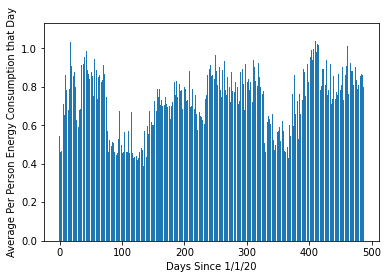

Brock: [Silver LEED Certified]


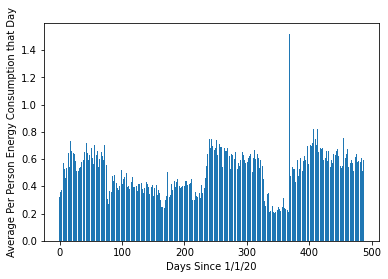

Breck: [Not Certified]


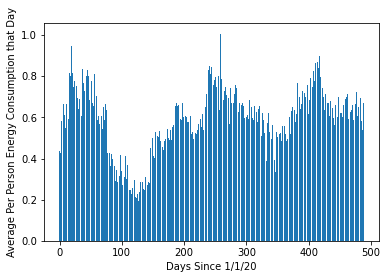

Yerkes: [Not Certified]


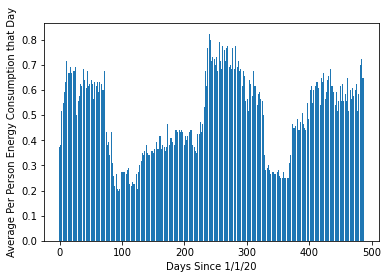

In [27]:
print("Pearl: [Gold LEED Certified]")
plot_capacity(pearl)
print("Brock: [Silver LEED Certified]")
plot_capacity(brock)
print("Breck: [Not Certified]")
plot_capacity(breck)
print("Yerkes: [Not Certified]")
plot_capacity(yerkes)

All four buildings follow similar trends throughout the year. One thing to note, though, is that all four buildings had very similar consumption per person regardless of whether or not they were LEED certified. 

### Plotting Average Consumption Per 1000 Square Feet Over Time

In [28]:
def plot_sq_ft(dataframe): 
    plt.bar(dataframe.index, dataframe.kw_per_sq_ft)
    plt.xlabel("Days Since 1/1/20")
    plt.ylabel("Average Per 1000 Ft^2 Energy Consumption that Day")
    plt.show()

Pearl: [Gold LEED Certified]


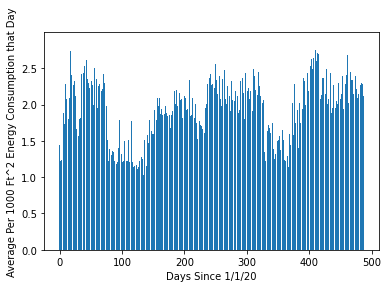

Brock: [Silver LEED Certified]


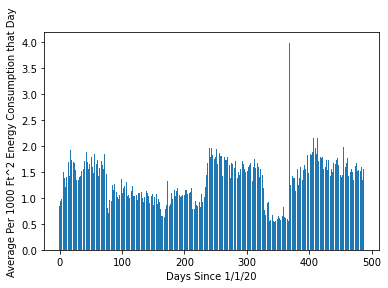

Breck: [Not Certified]


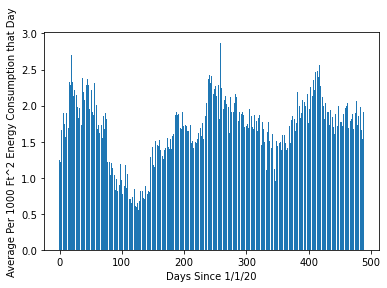

Yerkes: [Not Certified]


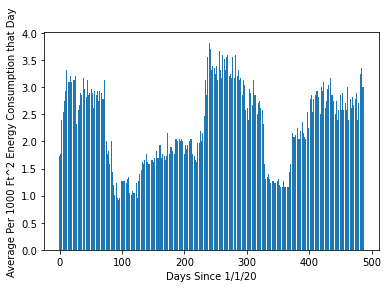

In [29]:
print("Pearl: [Gold LEED Certified]")
plot_sq_ft(pearl)
print("Brock: [Silver LEED Certified]")
plot_sq_ft(brock)
print("Breck: [Not Certified]")
plot_sq_ft(breck)
print("Yerkes: [Not Certified]")
plot_sq_ft(yerkes)

When we scale for the square footage, Pearl and Breck have similar square footage. Brock is efficient, and Yerkes is the least efficient. However, Yerkes has the least amount of square footage, so it is able to keep up in total energy consumption. 

## Model Fitting

We will now build a model for every single building. We decided, when looking at the temperature data, to model the kw_per_person as a function of the average temperature and whether or not the building was occupied. 

In [30]:
model = smf.ols(formula = 'kw_per_person ~ occupied + average_temp ', data = pearl).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     55.01
Date:                Wed, 12 May 2021   Prob (F-statistic):           2.93e-22
Time:                        16:41:14   Log-Likelihood:                 260.37
No. Observations:                 488   AIC:                            -514.7
Df Residuals:                     485   BIC:                            -502.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5503      0.031     18.001      0.000       0.490       0.610
occupied         0.1643      0.016     10.403      0.000       0.133       0.195
average_temp     0.0014      0.000      3.215      0.001       0.001       0.002
==============================================================================
Omnibus:                       10.648   Durbin-Watson:                   0.517
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.278
Skew:                          -0.079   Prob(JB):                       0.0433
Kurtosis:                       2.468   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient .0014 for the temperature coefficient tells us that as the temperature increases outside by 1 degree Fahrenheit, we expect the average kw_per_person for Pearl to increase by .0014. The more impactful variable is the occupancy variable, which increases the overall kw_per_person by .1643 whenever the building is occupied. 

In [31]:
model = smf.ols(formula = 'kw_per_person ~ occupied + average_temp ', data = breck).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     95.53
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.02e-35
Time:                        16:41:14   Log-Likelihood:                 293.13
No. Observations:                 489   AIC:                            -580.3
Df Residuals:                     486   BIC:                            -567.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4529      0.029     15.768      0.000       0.396       0.509
occupied         0.1864      0.015     12.596      0.000       0.157       0.215
average_temp     0.0001      0.000      0.305      0.761      -0.001       0.001
==============================================================================
Omnibus:                       26.593   Durbin-Watson:                   0.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.783
Skew:                           0.527   Prob(JB):                     2.07e-07
Kurtosis:                       3.633   Cond. No.                         283.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Temperature was not a signficant predictor for Breckenrigde. However, when the building was occupied the kw_per_person increased by .1864. 

In [32]:
model = smf.ols(formula = 'kw_per_person ~  occupied + average_temp ', data = yerkes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     47.70
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.23e-19
Time:                        16:41:14   Log-Likelihood:                 241.82
No. Observations:                 488   AIC:                            -477.6
Df Residuals:                     485   BIC:                            -465.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2968      0.032      9.347      0.000       0.234       0.359
occupied         0.1601      0.016      9.758      0.000       0.128       0.192
average_temp     0.0017      0.000      3.761      0.000       0.001       0.003
==============================================================================
Omnibus:                        6.634   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.040
Skew:                           0.136   Prob(JB):                       0.0805
Kurtosis:                       2.583   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The temperature for Yerkes did have a significant impact on the overall consumption. As the temperature increases by one degree Fahrenheit, the energy consumption per person is expected to increase by .0017. 

In [33]:
model = smf.ols(formula = 'kw_per_person ~ occupied + average_temp ', data = brock).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kw_per_person   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     26.03
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.83e-11
Time:                        16:41:14   Log-Likelihood:                 246.63
No. Observations:                 488   AIC:                            -487.3
Df Residuals:                     485   BIC:                            -474.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5341      0.031     16.988      0.000       0.472       0.596
occupied         0.0742      0.016      4.567      0.000       0.042       0.106
average_temp    -0.0014      0.000     -3.109      0.002      -0.002      -0.001
==============================================================================
Omnibus:                       50.511   Durbin-Watson:                   0.452
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.818
Skew:                           0.189   Prob(JB):                     7.76e-61
Kurtosis:                       6.670   Cond. No.                         281.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The temperature for Brock had a signficiant impact on the energy consumption. The negative coefficient implies that it takes more energy to heat Brock rather than to cool it. The occupancy variable also had a lower coefficient, .0742, than any other building. This implies that Brock's energy consumption does not change as much in times when students are not living there. 

## Analysis

The important context that our data provides comes from our graphs. The LEED certified buildings of Brock and Pearl did not have significantly lower energy consumption than the non-LEED certified buildings Breck and Yerkes. Though Yerkes did have a high consumption per 1000 square feet, Yerkes has a small amount of square footing so it is not using more energy per its capacity. 

Our recommendation to the school is for the school to build smaller, more energy efficient buildings. The recent trend towards giving more space to each student is not allowing for significant decreases to its energy consumption. Building smaller buildings that are LEED certified may allow the college to meet its goal of carbon neutrality by 2040. 

## Conclusion

This final project allowed us to work with a dataset of our choosing to help solve a problem. 

## Future Possibilities

In the future we would like to... 

    Look into more buildings we do not have data for
    
    Develop an ARIMA model for the data
    
    Analyze academic buildings

## Acknowledgements

Thank you to... 

    Dr. Allen for assistance in office hours
    
    Dr. Werner and Nick Bowman for providing us information and context

## References

“A. Eugene Brockman Residential Commons.” Hastings+Chivetta, 16 Feb. 2021, www.hastingschivetta.com/projects/a-eugene-brockman-residential-commons/.

LLC, Accelerated Innovations. “Energy Awareness &amp; Tracking Makes It Easy to Understand Your Home or Business.” MyMeter, mymeter.lge-ku.com/. 